<a href="https://colab.research.google.com/github/Alexa201228/ml_course_works/blob/main/MLProject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к финальному проекту по блоку классического ML

Работаем с [данными](https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv) сервиса проката велосипедов в Корее за год.

Описание данных:
- Date - дата;
- Rented Bike Count - сколько велосипедов было взято в прокат, целевая переменная;
- Hour - час дня;
- Temperature - температура воздуха в градусах Цельсия;
- Humidity - влажность воздуха;
- Wind Speed - скорость ветра в м/с;
- Visibility - мера различимости объектов на расстоянии в 10 метров;
- Dew point temperature -  температура, зарегистрированная в начале дня, в градусах Цельсия;
- Solar Radiation - интенсивность солнечного света;
- Rainfall - количество осадков в мм;
- Snowfall - количество выпавшего снега в мм;
- Seasons - время года;
- Holiday - является ли день праздничным;
- Functioning Day - маркер, работал ли сервис проката в указанное время.

**Цель работы**: изучить данные и выявить факторы влияющие на спрос велосипедов.

**Задачи**:  
1) Провести предобработку данных: проверить данные на наличие выбросов, ошибочных значений, пропусков, дубликатов и некорректных типов.  
2) Провести EDA: реализовать все уровни анализа (одномерные/многомерные) с использованием визуализаций, изучить распределения и взаимосвязь признаков.  
3) Подготовить данные для построения модели (кодирование признаков, масштабирование, разбиение выборки на обучающую и тестовую).  
4) Реализовать базовую регрессионную модель прогнозирования количества велосипедов, взятых в прокат.  
5) При помощи инструментов Feature Selection и подбора гиперпараметров подобрать наилучшую прогнозную модель по adjusted R2 (основная метрика) и RMSE.

Работа должна быть оформлена в виде аналитического отчёта, каждый этап должен сопровождаться выводами.

Обязательный критерий: добиться adjusted R2 не менее 85%.

**Дополнительные** (необязательные) **критерии**:  
1) Использовать пайплайны.  
2) Для оптимизизации гиперпараметров использовать HyperOpt.   
3) Добиться adjusted R2 не менее 89%.    


In [20]:
!pip install phik

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn import model_selection, metrics, preprocessing, linear_model

## Чтение и подготовка данных

### Чтение данных

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv',  encoding ='latin1')
print("Первые строки таблицы:\n")
display(df.head())
print("\nОписание таблицы:\n")
display(df.info())

Первые строки таблицы:



,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes



Описание таблицы:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8

None

### Проверка данных

In [23]:
print("Подсчет количества пропусков:\n")
display(df.isnull().sum())
print("\nОписательная статистика таблицы:\n")
display(df.describe())

Подсчет количества пропусков:



Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


Описательная статистика таблицы:



,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


В данном датасете нет пропусков. Также можно заметить, что диапазон данных в каждом столбце отличается, поэтому используем стандартизацию для уменьшения влияния фичей с большим диапозоном на обучение модели

### Корреляция с целевой переменной

#### Корреляция Пирсона

<ipython-input-24-48d82b9dabc3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

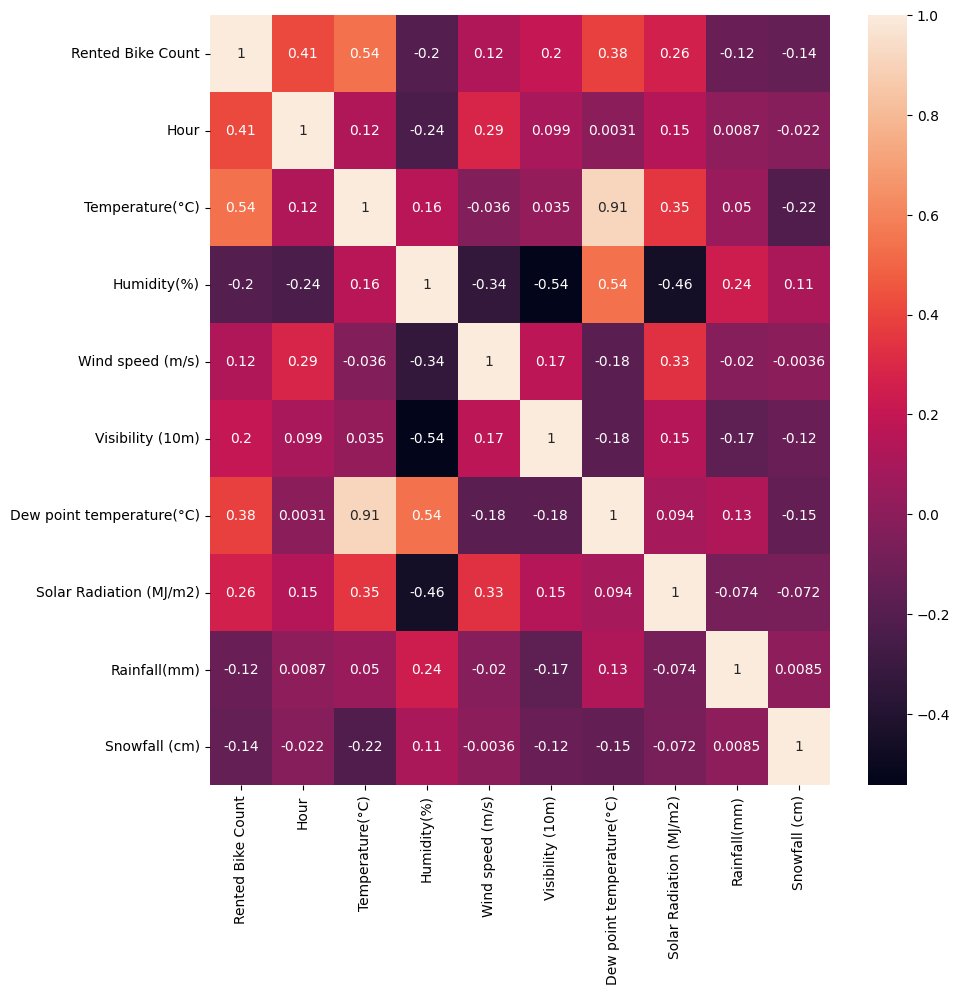

In [24]:
# Используем стандартную проверку на корреляцию

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True)

На heatmap можно заметить, что фичи Temperature и Dew point temperature коррелируют друг с другом и один из признаков можно исключить при построении модели

In [25]:
df = df.drop(["Dew point temperature(°C)"], axis=1)

<ipython-input-26-66ea6efafa7c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = df.corr()["Rented Bike Count"].abs().sort_values()


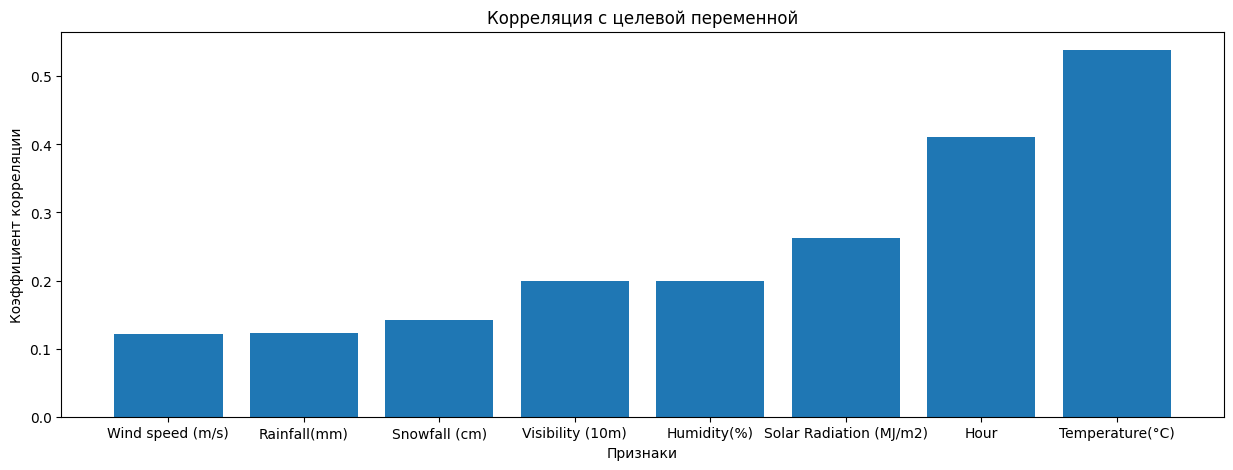

In [26]:
# Построим столбчатую диаграмму с корреляцией признаков с целевой переменной

corr_with_target = df.corr()["Rented Bike Count"].abs().sort_values()

# удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop("Rented Bike Count")


plt.figure(figsize=(15, 5))
plt.bar(corr_with_target.index, corr_with_target.values)
plt.title('Корреляция с целевой переменной')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции')
plt.show()

#### Корреляция phik

interval columns not set, guessing: ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


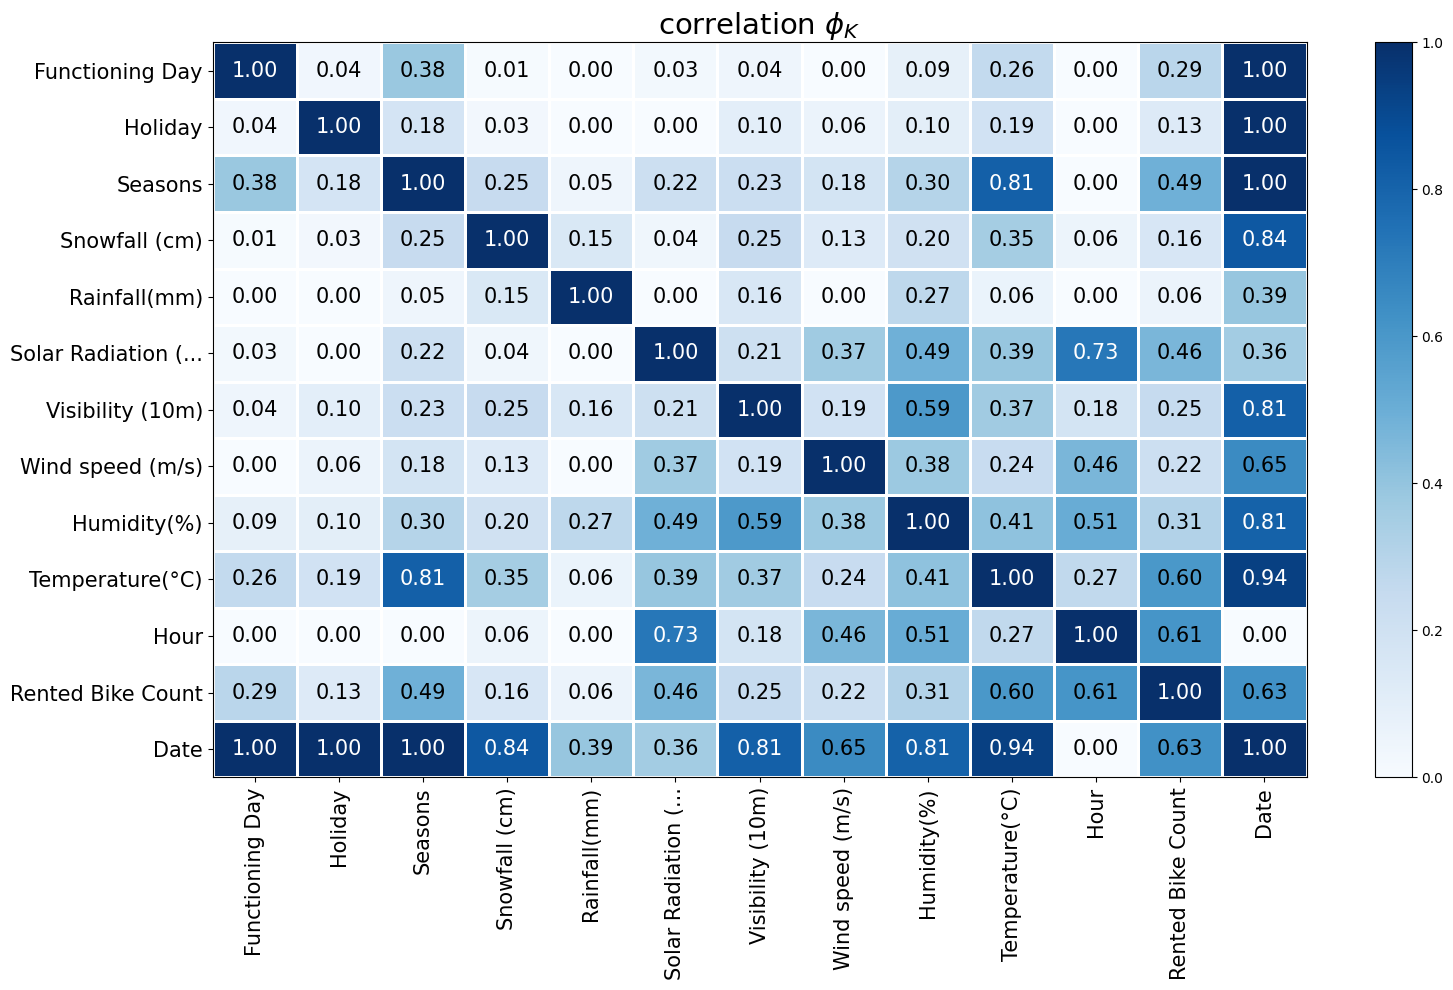

In [27]:
# Используем phik матрицу для нахождения корреляции

phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(16,10))
plt.tight_layout()

Phik корреляция показала высокую зависимость целевой переменной от следующих признаков:
- Temperature
- Solar Radiation
- Seasons
- Date
- Hour

При этом наблюдается высокая корреляция иежду переменными Hour и Solar Radiation, а также Seasons и Temperature

### Распределение признаков

<ipython-input-28-cebdfc7aa368>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rented Bike Count'], ax = ax[0,1])
<ipython-input-28-cebdfc7aa368>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature(°C)'], ax = ax[1,1])
<ipython-input-28-cebdfc7aa368>:9: UserWarning: 

`distplo

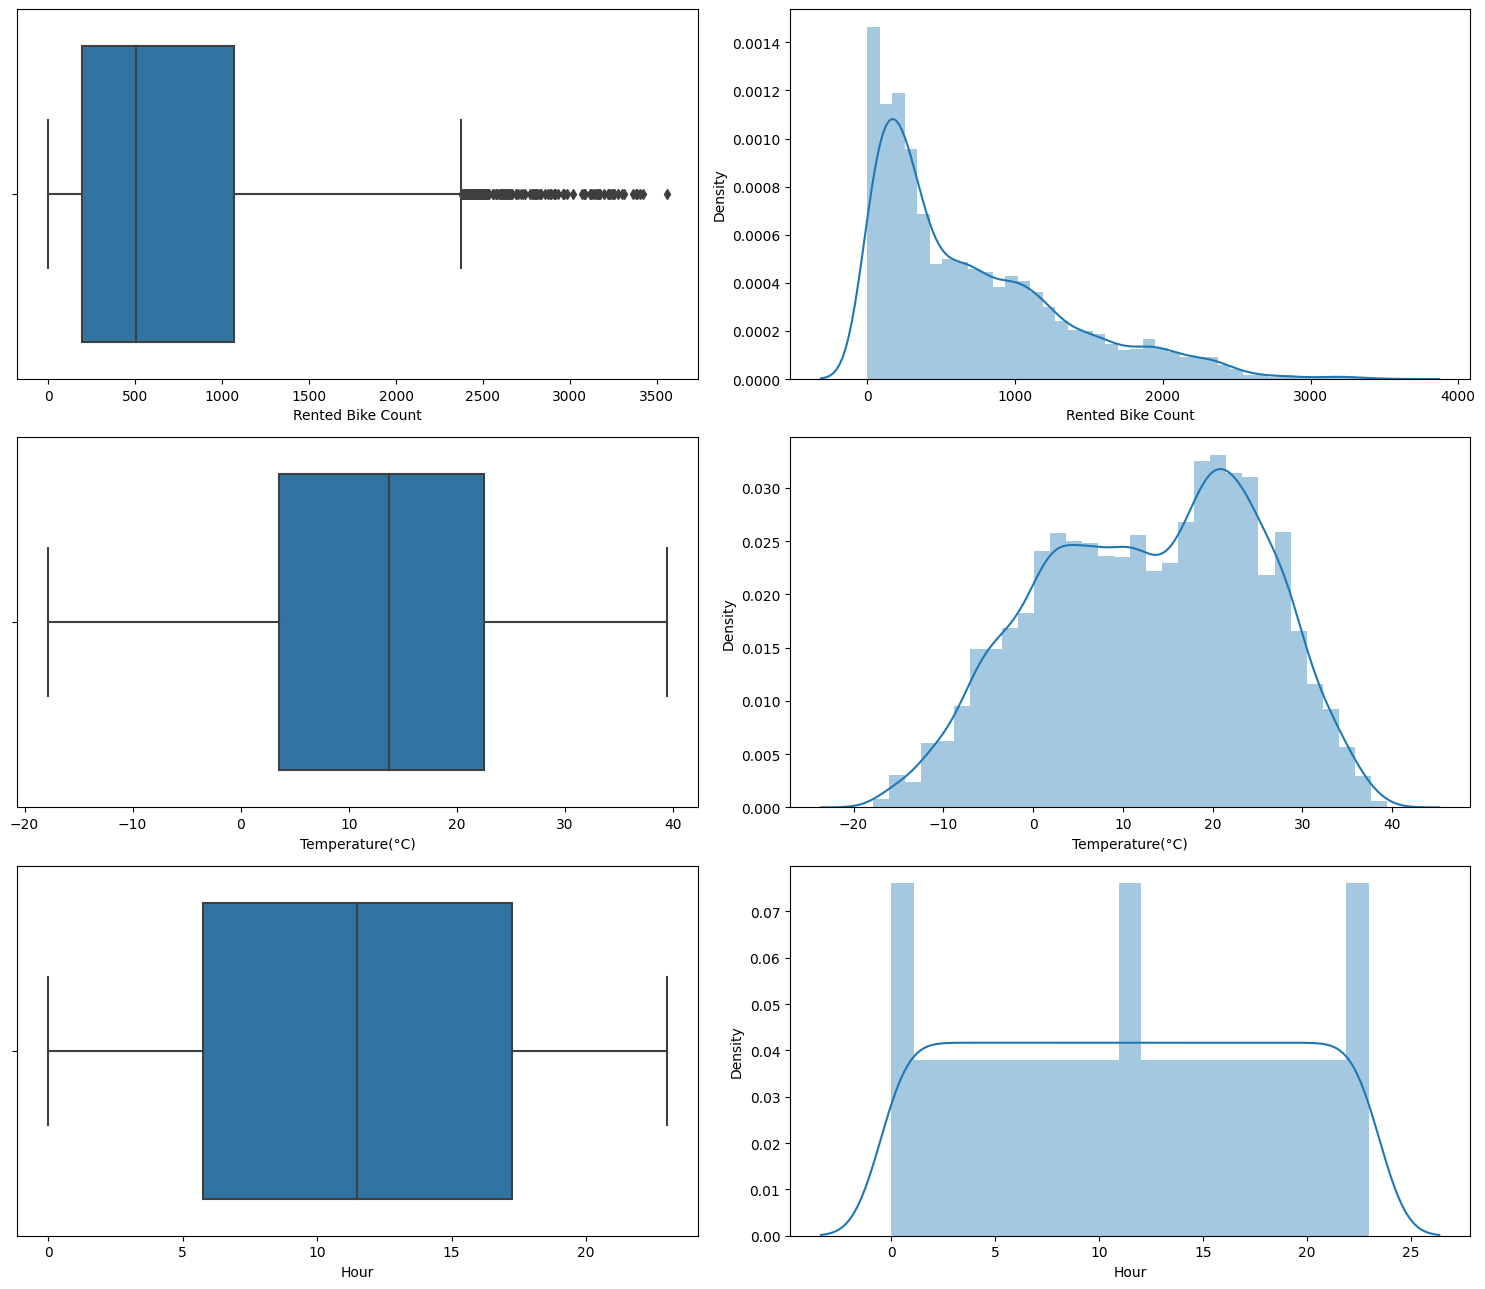

In [28]:
# Построим ящики с усами и графики распределения для целевой переменной и 2 признаков: Temperature(°C) и Hour

fig, ax = plt.subplots(3, 2, figsize = (15, 13))
sns.boxplot(x= df["Rented Bike Count"], ax = ax[0,0])
sns.distplot(df['Rented Bike Count'], ax = ax[0,1])
sns.boxplot(x= df["Temperature(°C)"], ax = ax[1,0])
sns.distplot(df['Temperature(°C)'], ax = ax[1,1])
sns.boxplot(x= df["Hour"], ax = ax[2,0])
sns.distplot(df['Hour'], ax = ax[2,1])
plt.tight_layout()

### Pairplot

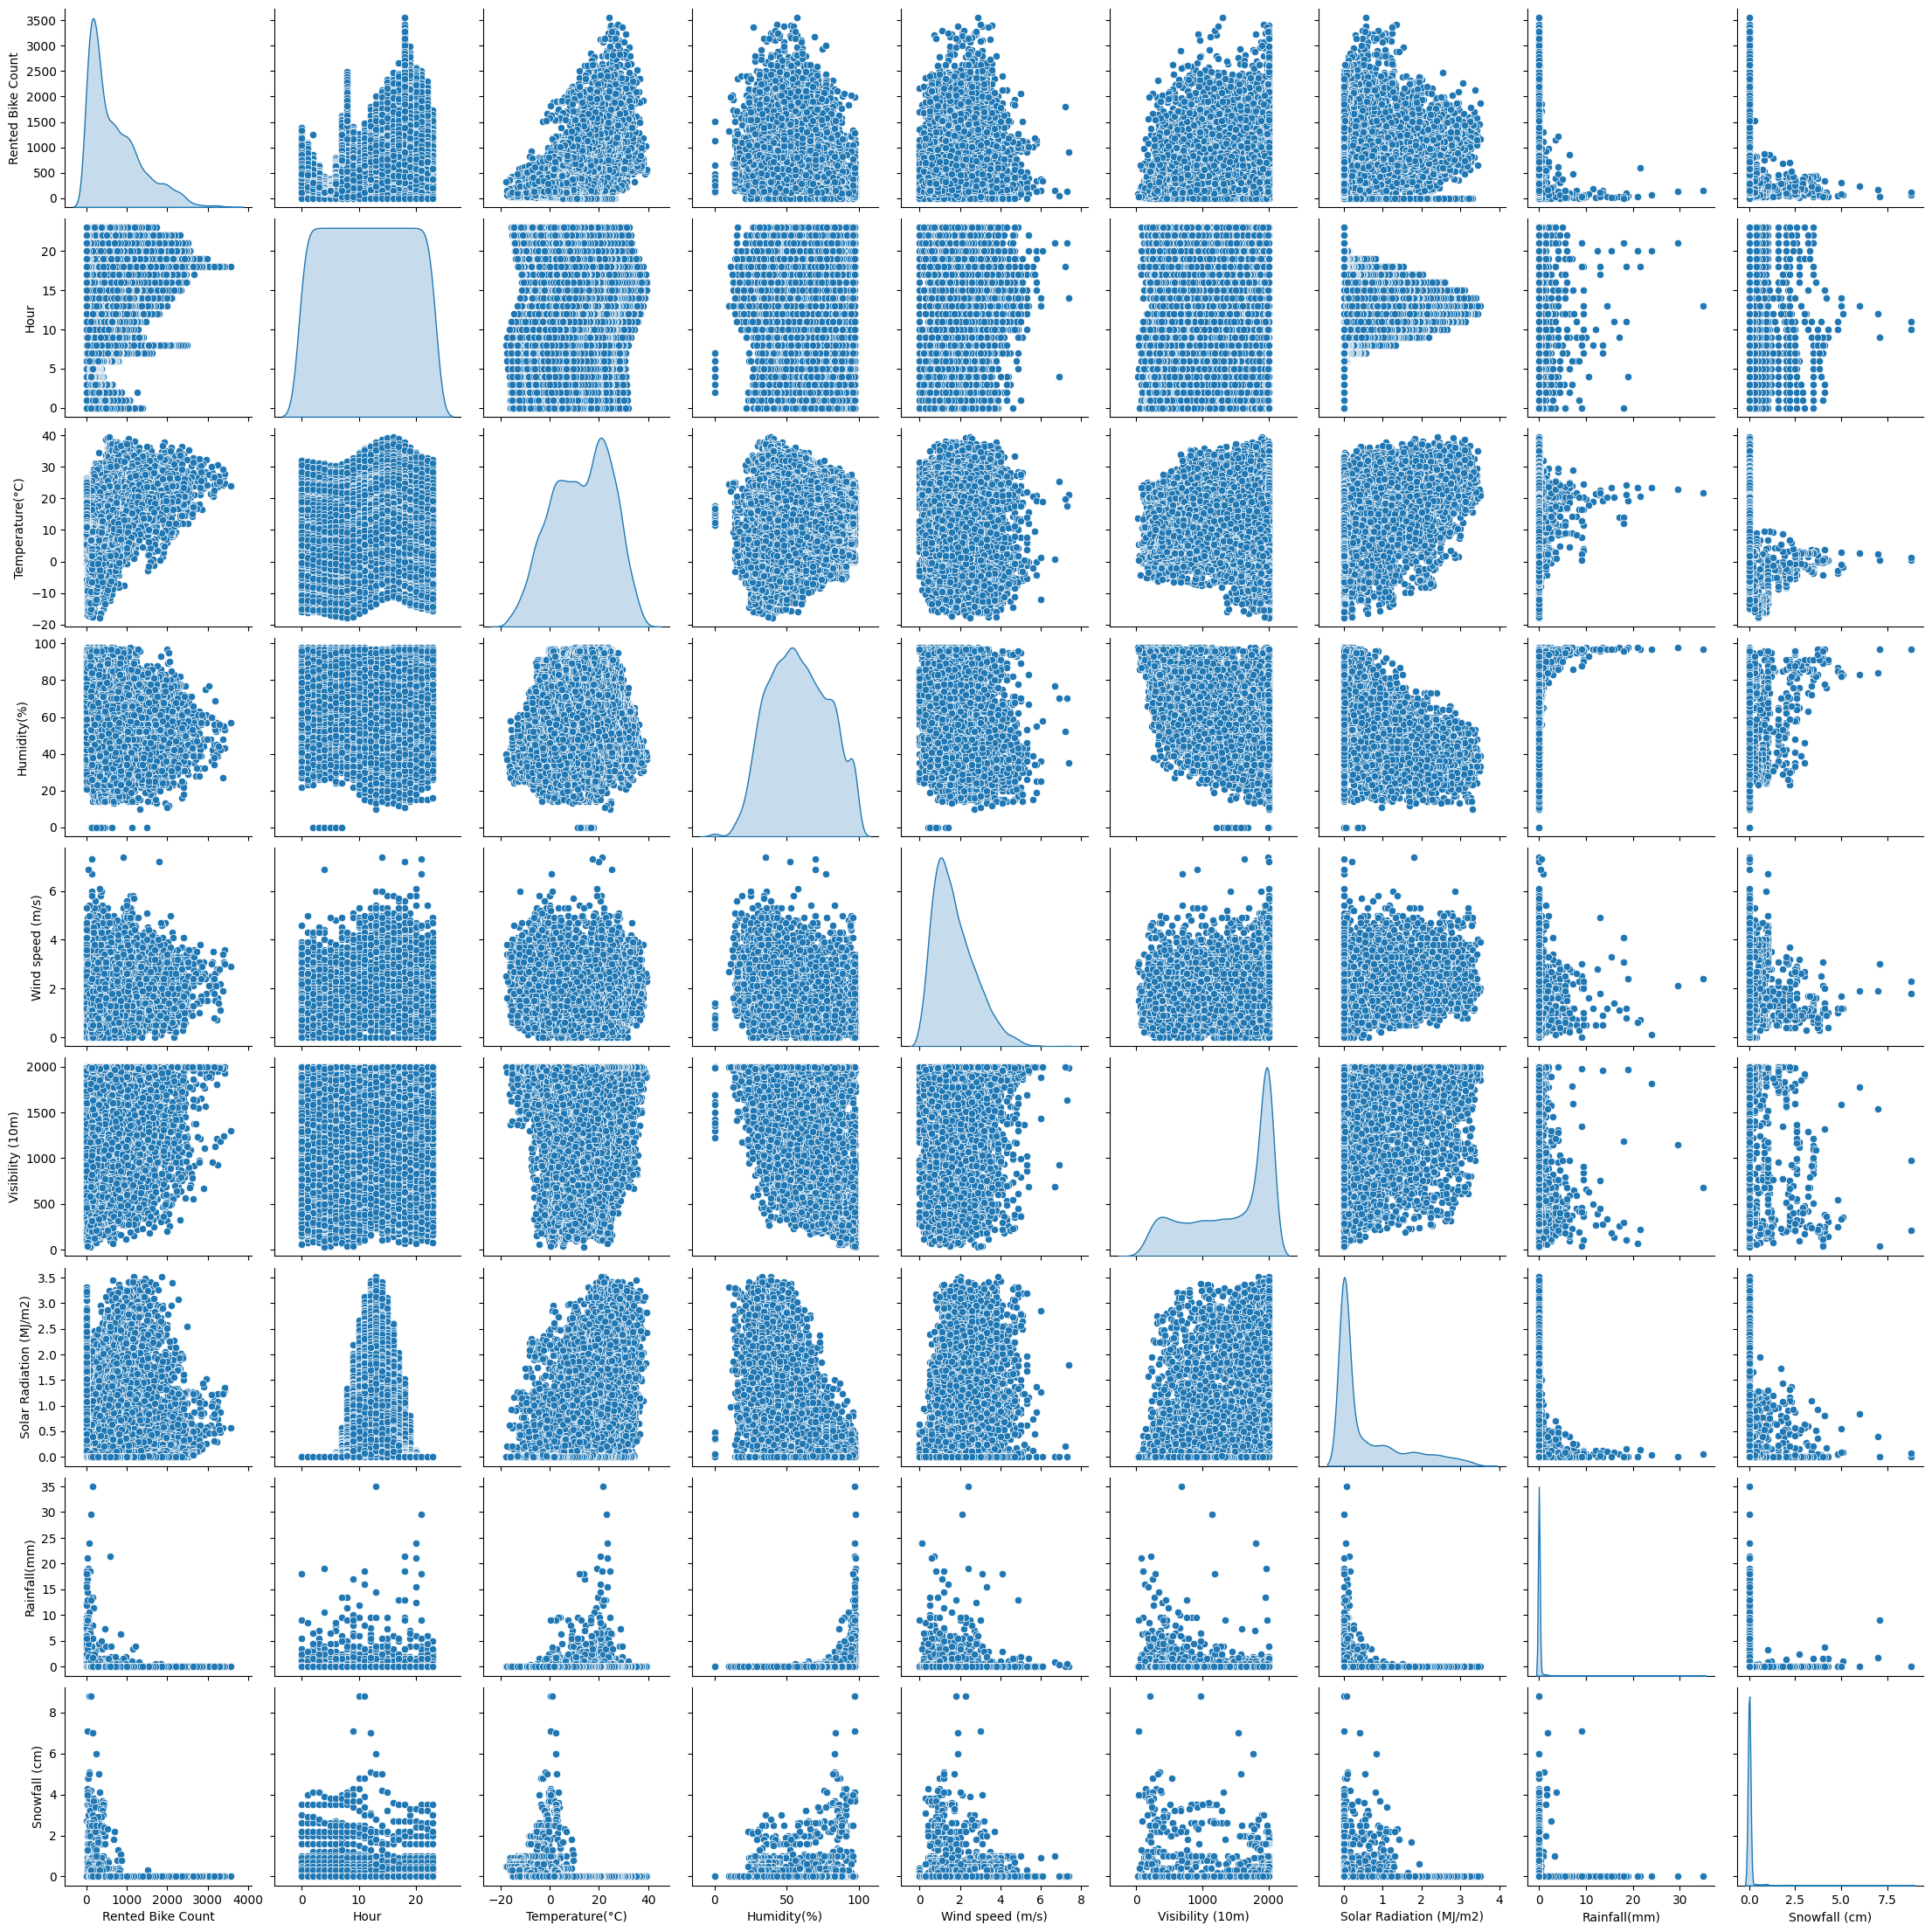

In [29]:
sns.pairplot(df, diag_kind='kde')

По этому графику можно сделать вывод, что распределение большинства признаков сильно отличается от нормального

### Предобработка данных

В процессе предобработки данных необходимо привести данные к типам, соответствующим их природе (например дату в datetime), преобразовать категориальные признаки в числовые (Seasons, Holiday, Functioning Day), и стандартизировать их.

In [30]:
# Преобразуем признаки по типам данных
# Для преобразования даты в формат, удобный для обучения модели, переводим ее в формат timestamp

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df["Timestamp"] = df["Date"].values.astype(np.int64) // 10 ** 9
df = df.drop(["Date"], axis=1)
df = pd.get_dummies(df, columns=["Seasons", "Holiday", "Functioning Day"], drop_first=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Timestamp                8760 non-null   int64  
 10  Seasons_Spring           8760 non-null   uint8  
 11  Seasons_Summer           8760 non-null   uint8  
 12  Seasons_Winter           8760 non-null   uint8  
 13  Holiday_No Holiday       8760 non-null   uint8  
 14  Functioning Day_Yes     

#### Разбиение выборки на обучающую и тестовую

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(["Rented Bike Count"], axis=1), df["Rented Bike Count"],  random_state=42)

#### Стандартизация

In [33]:
# Используем стандартизацию

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение моделей и оценка качества

Так как оценку качества моделей необходимо производить с помощью метрики Adjusted R2 и RMSE, необходимо сперва реализовать метод для подсчета Adjusted R2 (тк готовой реализации в библиотеке не найдено)

In [34]:
from sklearn import metrics

def calculate_adjusted_r2(y: pd.Series, y_pred: pd.Series, **kwargs) -> float:
  n = X_train.shape[0]
  k = X_train.shape[1]

  return 1 - (1 - metrics.r2_score(y, y_pred)) * (n - 1) / (n - k - 1)

adj_scorer = metrics.make_scorer(calculate_adjusted_r2, greater_is_better=True)

### Baseline модель

Для построения baseline модели используем линейную регрессию со всеми признаками (кроме Dew point temperature(°C), который мы исключили ранее в связи с высокой корреляцией). Также воспользуемся кросс-валидацией для подбора параметров моделей в дальнейшем.

In [35]:
# Линейная регрессия с кросс-валидацией

from sklearn import model_selection, linear_model

baseline_linear_model = linear_model.LinearRegression()

baseline_cv_results = model_selection.cross_validate(
    estimator=baseline_linear_model,
    X=X_train,
    y=y_train,
    scoring=adj_scorer,
    cv=5,
    return_train_score=True
    )

baseline_cv_results

{'fit_time': array([0.01799488, 0.0318408 , 0.02936292, 0.02972555, 0.03119135]),
 'score_time': array([0.016222  , 0.01033044, 0.01053262, 0.01122928, 0.01401782]),
 'test_score': array([0.5158653 , 0.56890016, 0.5831954 , 0.54966986, 0.56577474]),
 'train_score': array([0.56943177, 0.55570548, 0.55202867, 0.56058341, 0.55661111])}

#### Оценка качества baseline модели

In [36]:
print(f"Среднее качество на тренировочной выборке: {np.mean(baseline_cv_results['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(baseline_cv_results['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.56
Среднее качество на валидационной выборке: 0.56


### Модель с отобранными признаками

В процессе EDA были найдены следующие признаки, которые сильно коррелируют с целевой переменной:

- Temperature
- Solar Radiation
- Seasons
- Date (Timestamp)
- Hour

Построим модель, используя только эти признаки

In [37]:
# Линейная регрессия с подбором признаков

features = ['Temperature(°C)', 'Solar Radiation (MJ/m2)', "Seasons_Spring", "Seasons_Summer", "Seasons_Winter", "Hour", "Timestamp"]
X = df[features]
y = df["Rented Bike Count"]

# Split data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,  random_state=42)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


linear_model_with_selected_features = linear_model.LinearRegression()

cv_results = model_selection.cross_validate(
    estimator=linear_model_with_selected_features,
    X=X_train,
    y=y_train,
    scoring=adj_scorer,
    cv=5,
    return_train_score=True
    )

print(f"Среднее качество на тренировочной выборке: {np.mean(cv_results['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_results['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.43
Среднее качество на валидационной выборке: 0.42


При отборе признаков качество модели на валидационной выборке ухудшилось до 0.42

### Добавление полиномиальных признаков

При добавлении полиномиальных признаков необходимо также дополнить функцию для измерения метрики качества модели, тк размер обучающей и валидационной выборки  увеличивается

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(["Rented Bike Count"], axis=1), df["Rented Bike Count"], test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.fit_transform(X_test_scaled)



In [39]:
def calculate_adjusted_poly_r2(y: pd.Series, y_pred: pd.Series, **kwargs) -> float:
  n = X_train_poly.shape[0]
  k = X_train_poly.shape[1]

  return 1 - (1 - metrics.r2_score(y, y_pred)) * (n - 1) / (n - k - 1)

adj_scorer_poly = metrics.make_scorer(calculate_adjusted_poly_r2, greater_is_better=True)

In [40]:
linear_model_with_polynomial = linear_model.LinearRegression()

cv_results = model_selection.cross_validate(
    estimator=linear_model_with_polynomial,
    X=X_train_poly,
    y=y_train,
    scoring=adj_scorer_poly,
    cv=5,
    return_train_score=True
    )

print(f"Среднее качество на тренировочной выборке: {np.mean(cv_results['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_results['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.72
Среднее качество на валидационной выборке: 0.70


После добавления полиномиальных признаков качество модели возросло до 0.73 на тестовой выборке и 0.70 на валидационной выборке

### Построение моделей с использованием регуляризации

#### L1 регуляризация

In [41]:

lasso_model = linear_model.Lasso(alpha=0.01, random_state=42)

cv_results_lasso = model_selection.cross_validate(
    estimator=lasso_model,
    X=X_train_poly,
    y=y_train,
    scoring=adj_scorer_poly,
    cv=5,
    return_train_score=True
    )

print(f"Среднее качество на тренировочной выборке: {np.mean(cv_results_lasso['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_results_lasso['test_score']):.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+08, tolerance: 2.348e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.928e+08, tolerance: 2.339e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.643e+08, tolerance: 2.304e

Среднее качество на тренировочной выборке: 0.72
Среднее качество на валидационной выборке: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.454e+08, tolerance: 2.342e+05
  model = cd_fast.enet_coordinate_descent(


#### L2 регуляризация

In [42]:
rigde_model = linear_model.Ridge(alpha=1000, random_state=42)

cv_results_ridge = model_selection.cross_validate(
    estimator=rigde_model,
    X=X_train_poly,
    y=y_train,
    scoring=adj_scorer_poly,
    cv=5,
    return_train_score=True
    )

print(f"Среднее качество на тренировочной выборке: {np.mean(cv_results_ridge['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_results_ridge['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.69
Среднее качество на валидационной выборке: 0.68


### Random forest regressor

Обучим модель RandomForestRegressor и сравним результаты с предыдущими моделями. При обучении используем также полиномиальные признаки

In [43]:
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

cv_results = model_selection.cross_validate(
    estimator=rf_regressor,
    X=X_train_poly,
    y=y_train,
    scoring=adj_scorer_poly,
    cv=5,
    return_train_score=True
    )

print(f"Среднее качество на тренировочной выборке: {np.mean(cv_results['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_results['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.98
Среднее качество на валидационной выборке: 0.88


### Подбор гиперпараметров с использованием HyperOpt

In [44]:
!pip install hyperopt

In [45]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import space_eval

space= {
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 25, 1),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
    'max_depth': hp.quniform('max_depth', 1, 50, 1),
    'criterion': hp.choice('criterion', ["squared_error", "absolute_error", "friedman_mse", "poisson"])
}


In [46]:
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train_poly, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'min_samples_leaf': int(params['min_samples_leaf']),
              'max_features': params['max_features'],
             'max_depth': int(params['max_depth']),
             'criterion': params['criterion'],
              }

    # используем эту комбинацию для построения модели
    model = RandomForestRegressor(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)

    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    score = model_selection.cross_val_score(model, X, y, cv=cv, scoring=adj_scorer_poly, n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score


In [47]:
trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=15, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

print(f"Наилучшие значения гиперпараметров {best}")

 13%|█▎        | 2/15 [00:44<04:55, 22.76s/trial, best loss: -0.8745636252343235]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 20%|██        | 3/15 [02:59<14:49, 74.14s/trial, best loss: -0.876787348438618] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 40%|████      | 6/15 [05:29<06:58, 46.53s/trial, best loss: -0.876787348438618]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 73%|███████▎  | 11/15 [12:29<05:46, 86.55s/trial, best loss: -0.8828706081098263] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 93%|█████████▎| 14/15 [18:02<01:57, 117.49s/trial, best loss: -0.8828706081098263]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



100%|██████████| 15/15 [18:32<00:00, 74.15s/trial, best loss: -0.8828706081098263]
Наилучшие значения гиперпараметров {'criterion': 0, 'max_depth': 14.0, 'max_features': 1, 'min_samples_leaf': 2.0}


### Построение RandomForestRegressor с оптимальными гиперпараметрами

In [48]:
rf_regressor_optimized = RandomForestRegressor(
    n_estimators=200,
    max_features="sqrt",
    criterion="absolute_error",
    max_depth=14,
    min_samples_leaf=2,
    random_state=42)

cv_results_optimized = model_selection.cross_validate(
    estimator=rf_regressor_optimized,
    X=X_train_poly,
    y=y_train,
    scoring=adj_scorer_poly,
    cv=5,
    return_train_score=True,
    n_jobs=-1
    )

print(f"Среднее качество на тренировочной выборке: {np.mean(cv_results_optimized['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_results_optimized['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.94
Среднее качество на валидационной выборке: 0.88


Можно заметить, что подбор гиперпараметров с помощью HyperOpt не дал прирост качества модели на валидационной выборке

### Дополнительные эксперименты

#### Бустинг

Построим модель градиентного бустинга для регрессии и сравним результаты с предыдущими моделями

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,
    max_features="sqrt",
    learning_rate=0.4,
)

gb_cv_results = model_selection.cross_validate(
  estimator=gb,
  X=X_train_poly,
  y=y_train,
  scoring=adj_scorer_poly,
  cv=5,
  return_train_score=True,
  n_jobs=-1
)

print(f"Среднее качество на тренировочной выборке: {np.mean(gb_cv_results['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(gb_cv_results['test_score']):.2f}")

Среднее качество на тренировочной выборке: 0.94
Среднее качество на валидационной выборке: 0.88


In [70]:
# Подберем параметры модели Gradient Boosting Regressor

random_state = 42

space= {
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 25, 1),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']),
    'max_depth': hp.quniform('max_depth', 1, 50, 1),
    'learning_rate': hp.quniform('learning_rate', 0.01, 1, 0.05),
    'alpha': hp.quniform('alpha', 0.01, 0.95, 0.05),
    'criterion': hp.choice('criterion', ["squared_error", "friedman_mse"])
}


def hyperopt_gb(params, cv=5, X=X_train_poly, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'min_samples_leaf': int(params['min_samples_leaf']),
              'max_features': params['max_features'],
             'max_depth': int(params['max_depth']),
             'criterion': params['criterion'],
              'learning_rate': params['learning_rate'],
              'alpha': params['alpha'],
              }

    # используем эту комбинацию для построения модели
    model = GradientBoostingRegressor(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)

    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    score = model_selection.cross_val_score(model, X, y, cv=cv, scoring=adj_scorer_poly, n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [71]:
trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_gb, # наша функция
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=10, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

print(f"Наилучшие значения гиперпараметров {best}")

 20%|██        | 2/10 [00:59<03:47, 28.47s/trial, best loss: -0.8939160263766208]

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.1

 30%|███       | 3/10 [09:31<29:05, 249.35s/trial, best loss: -0.8939160263766208]

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.1

 60%|██████    | 6/10 [19:05<11:04, 166.04s/trial, best loss: -0.8939160263766208]

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(

/usr/local/lib/python3.1

100%|██████████| 10/10 [21:59<00:00, 131.90s/trial, best loss: -0.8939160263766208]
Наилучшие значения гиперпараметров {'alpha': 0.55, 'criterion': 1, 'learning_rate': 0.05, 'max_depth': 43.0, 'max_features': 1, 'min_samples_leaf': 8.0}


In [72]:
# Строим Gradient Boosting модель с подобранными параметрами

gb = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,
    min_samples_leaf=int(best["min_samples_leaf"]),
    max_depth=int(best["max_depth"]),
    alpha=best["alpha"],
    max_features=['auto', 'sqrt', 'log2'][best['max_features']],
    learning_rate=best["learning_rate"],
    criterion=["squared_error", "friedman_mse"][best["criterion"]],
)

gb_cv_results = model_selection.cross_validate(
  estimator=gb,
  X=X_train_poly,
  y=y_train,
  scoring=adj_scorer_poly,
  cv=5,
  return_train_score=True,
  n_jobs=-1
)

print(f"Среднее качество на тренировочной выборке: {np.mean(gb_cv_results['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(gb_cv_results['test_score']):.2f}")

Среднее качество на тренировочной выборке: 1.00
Среднее качество на валидационной выборке: 0.90


In [73]:
# Обучим полученную модель

gb.fit(X_train_poly, y_train)
gb_regressor_predict = gb.predict(X_test_poly)

In [74]:
# Оценка качества модели

print(f"Качество на тестовой выборке: {calculate_adjusted_poly_r2(y_test, gb_regressor_predict):.2f}")

Качество на тестовой выборке: 0.89


#### Стекинг

Для стекинга используем модели, которые мы обучали ранее, а метамодель стекинга - линейная регрессия

In [60]:
estimators = [
    ('lr', linear_model.LinearRegression()),
    ('rf',  RandomForestRegressor(n_estimators=200,
                                  max_features="sqrt",
                                  criterion="absolute_error",
                                  max_depth=14,
                                  min_samples_leaf=2,
                                  random_state=42,
                                  n_jobs=-1
                                  ),
     ('gb', GradientBoostingRegressor(
           random_state=42,
           n_estimators=200,
           max_features="sqrt",
           learning_rate=0.4,
     )))
]

In [61]:
from sklearn.ensemble import StackingRegressor

reg = StackingRegressor(
    estimators=estimators, # базовые модели в стекинге
    final_estimator=linear_model.LinearRegression(), # метамодель
    n_jobs=-1
)

# Обучаем модель
reg.fit(X_train_poly, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(criterion='absolute_error',
                                                     max_depth=14,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42),
                               ('gb',
                                GradientBoostingRegressor(learning_rate=0.4,
                                                          max_features='sqrt',
                                                          n_estimators=200,
                                                          random_state=42)))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [62]:
# Оценка качества модели

stacking_predict = reg.predict(X_test_poly)

print(f"Качество на тестовой выборке: {calculate_adjusted_poly_r2(y_test, stacking_predict):.2f}")

Качество на тестовой выборке: 0.87


Стекинг не дал прироста качества по сравнению с RandomForestRegressor, при этом затраты на обучение модели увеличились

## Итоговая модель - GradientBoostingRegressor

В качестве итоговой модели был выбран GradientBoostingRegressor так как он показал наивысшее качество по метрике adjusted R2

In [76]:
gb.fit(X_train_poly, y_train)
gb_regressor_predict = gb.predict(X_test_poly)

In [77]:
# Оценка качества модели

print(f"Качество на тестовой выборке adjusted R^2: {calculate_adjusted_poly_r2(y_test, gb_regressor_predict):.2f}")
print(f"Качество на тестовой выборке RMSE: {np.sqrt(metrics.mean_squared_error(y_test, gb_regressor_predict)):.2f}")

Качество на тестовой выборке adjusted R^2: 0.89
Качество на тестовой выборке RMSE: 210.96


## Выводы

В ходе выполнения задачи на построение модели регрессии был проведен EDA, предобработка данных и последующие построения моделей регрессии. Была проведена стандартизация признаков и преобразование категориальных признаков в числовые.

При построении моделей использовались регрессия с полиномиальными признаками, а также стекинг, градиентный бустинг и случайный лес. Для подбора гиперпараметров использовался HyperOpt.

Наилуший результат показала модель GradientBoostingRegressor с оптимизированными параметрами, по adjusted R^2 результат=0.89